## Plot PAPI data

### Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Load the dataset
try:
    df_papi = pd.read_csv('papi_data.csv')
except FileNotFoundError:
    print("Error: papi_data.csv not found. Please ensure the file is in the correct directory.")
    # In a real notebook, you might exit or stop execution here.
    # For this example, we'll create an empty DataFrame to avoid further errors.
    df_papi = pd.DataFrame()

# Calculate the L3 cache miss ratio
# Avoid division by zero by adding a small epsilon where TCA is 0
df_papi['cache_miss_ratio'] = df_papi['PAPI_L3_TCM'] / df_papi['PAPI_L3_TCA'].replace(0, 1)

In [2]:
# Define dataset groups, similar to the plots notebook
dataset_groups = {
  'Road Networks': ['asia_osm', 'europe_osm', 'GAP-road'],
  'RGG': ['rgg_n_2_22_s0'],
  'FEM': ['Hook_1498', 'PFlow_742', 'Geo_1438']
}

# Add a new column to classify datasets by type
df_papi['dataset_type'] = df_papi['dataset_name'].map(
  lambda x: next((key for key, values in dataset_groups.items() if x in values), 'Unknown')
)

# Define the desired order for plotting
plot_order = ['Road Networks', 'FEM', 'RGG']

# Convert the 'dataset_type' column to a categorical type with the specified order
df_papi['dataset_type'] = pd.Categorical(df_papi['dataset_type'], categories=plot_order, ordered=True)

# Sort the DataFrame to ensure plots are generated in the correct order
df_papi = df_papi.sort_values('dataset_type')

# Ensure 'ncpus' is treated as a categorical variable for plotting
df_papi['ncpus'] = df_papi['ncpus'].astype('category')

### Plot the data

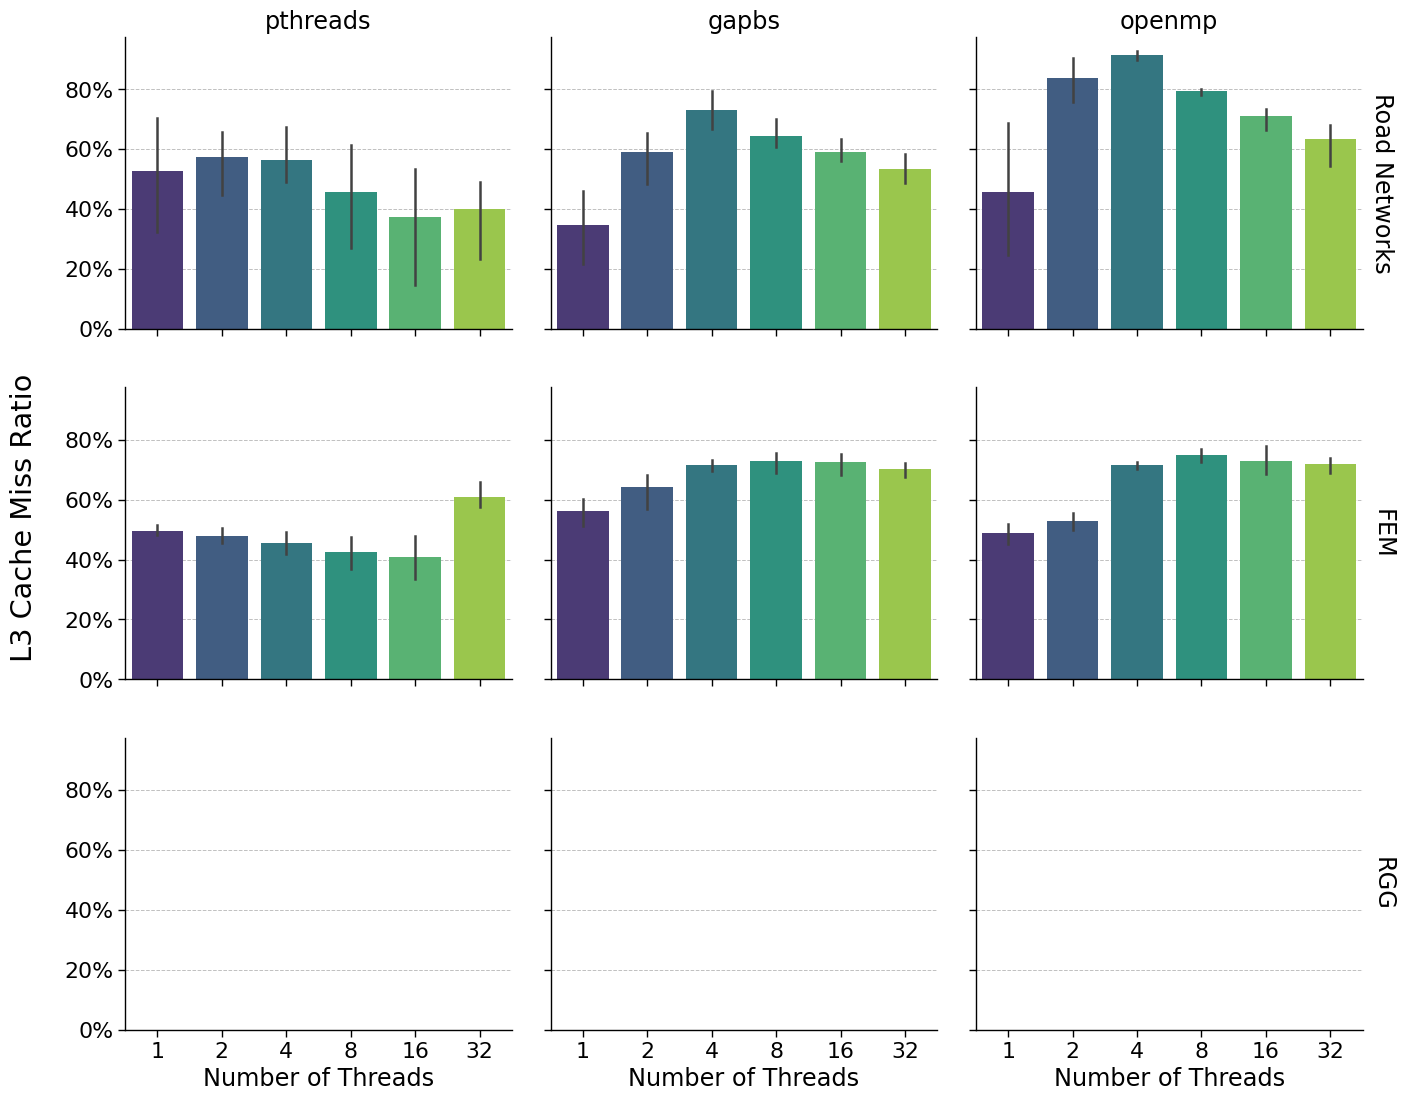

In [3]:
# Plot the cache miss ratio
with sns.plotting_context("paper", font_scale=1.8):
    g = sns.catplot(
        data=df_papi,
        x='ncpus',
        y='cache_miss_ratio',
        col='implementation',
        row='dataset_type',
        kind='bar',
        height=4,
        aspect=1.2,
        palette='viridis',
        hue='ncpus',
        dodge=False, # No need to dodge when hue is the same as x
        legend=False,
        margin_titles=True,
        sharey=True
    )

    # Improve plot aesthetics
    g.figure.supylabel("L3 Cache Miss Ratio", x=0.02)
    g.set_axis_labels("Number of Threads", "")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")

    # Format y-axis as percentage and add grid
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        ax.grid(which='major', axis='y', linestyle='--', linewidth=0.7, alpha=0.8)
        ax.set_axisbelow(True) # Ensure grid is behind bars
        ax.set_ylabel('') # Remove individual subplot y-labels

    # Adjust layout
    g.figure.subplots_adjust(left=0.1, top=0.9, wspace=0.1, hspace=0.2)

    # Save the figure
    plt.savefig('cache_miss_ratio.png',
                dpi=300,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none',
                format='png')

    plt.show()